Basado en el artículo de Ubeda y Dueñez del 2010 "Power and Corruption"

Primer intento para programar la dinámica del juego de la corrupción

In [1]:
def dilema_prisionero(estrategia_jugador1, estrategia_jugador2):
  """
  Simula una ronda del dilema del prisionero.

  Args:
    estrategia_jugador1: Una cadena de texto que indica la estrategia del jugador 1 ('cooperar' o 'no cooperar').
    estrategia_jugador2: Una cadena de texto que indica la estrategia del jugador 2 ('cooperar' o 'no cooperar').

  Returns:
    Una tupla con las recompensas de cada jugador.
  """

  # Matriz de pagos (ejemplo)
  pagos = {
      ('cooperar', 'cooperar'): (3, 3),
      ('cooperar', 'no cooperar'): (0, 5),
      ('no cooperar', 'cooperar'): (5, 0),
      ('no cooperar', 'no cooperar'): (1, 1)
  }

  recompensa_jugador1, recompensa_jugador2 = pagos[(estrategia_jugador1, estrategia_jugador2)]
  return recompensa_jugador1, recompensa_jugador2

# Ejemplo de uso:
jugador1 = input("Jugador 1, ¿cooperas o no cooperas? ")
jugador2 = input("Jugador 2, ¿cooperas o no cooperas? ")

resultado = dilema_prisionero(jugador1, jugador2)
print("Jugador 1 obtuvo:", resultado[0])
print("Jugador 2 obtuvo:", resultado[1])

Extiendo la matriz a las 4 estrategias, relleno con los valores de la matriz de pago de México

In [3]:
import random

def juego_corrupcion(estrategia1, estrategia2):
  """
  Simula una ronda.

  Args:
    estrategia1: Una cadena de texto que indica la estrategia del jugador 1 ('C', 'N', 'PC', 'PN').
    estrategia2: Una cadena de texto que indica la estrategia del jugador 2 ('C', 'N', 'PC', 'PN').

  Regresa:
    Una tupla con las recompensas de cada jugador.
  """

  # Matriz de pagos (México)
  pagos = {
      ('C', 'C'): (1, 1),
      ('C', 'N'): (-2, 2),
      ('C', 'PC'): (1, -3),
      ('C', 'PN'): (-2, -1),
      ('N', 'C'): (2, -2),
      ('N', 'N'): (0, 0),
      ('N', 'PC'): (1, -3),
      ('N', 'PN'): (-1, -4),
      ('PC', 'C'): (1, 1),
      ('PC', 'N'): (-3, 2),
      ('PC', 'PC'): (1, 1),
      ('PC', 'PN'): (-4, 0),
      ('PN', 'C'): (2, -2),
      ('PN', 'N'): (-1, 0),
      ('PN', 'PC'): (0, 1),
      ('PN', 'PN'): (-4, -4)
  }

  return pagos[(estrategia1, estrategia2)]

# Ejemplo de uso:
estrategia_jugador1 = 'PC'
estrategia_jugador2 = 'PC'

resultado = juego_corrupcion(estrategia_jugador1, estrategia_jugador2)
print("Jugador 1 obtuvo:", resultado[0])
print("Jugador 2 obtuvo:", resultado[1])

Jugador 1 obtuvo: 1
Jugador 2 obtuvo: 1


Se añade la opción de la simulación, donde se repite el juego y cada jugador puede elegir que estrategia usar

In [1]:
import random

def simular_partidas(num_partidas, estrategia1, estrategia2):
  """
  Simula múltiples partidas del dilema del prisionero.

  Args:
    num_partidas: Número de partidas a simular.
    estrategia1: Función que determina la estrategia del jugador 1.
    estrategia2: Función que determina la estrategia del jugador 2.

  Returns:
    Una lista con las recompensas totales de cada jugador.
  """

  # Inicializar las recompensas totales
  recompensas_jugador1 = 0
  recompensas_jugador2 = 0

  for _ in range(num_partidas):
    # Determinar las estrategias para esta ronda
    accion_jugador1 = estrategia1()
    accion_jugador2 = estrategia2()

    # Obtener las recompensas de la ronda
    recompensa1, recompensa2 = dilema_prisionero(accion_jugador1, accion_jugador2)

    # Acumular las recompensas totales
    recompensas_jugador1 += recompensa1
    recompensas_jugador2 += recompensa2

  return recompensas_jugador1, recompensas_jugador2

#Ejemplo de la simulación

def siempre_cooperar():
  return 'C'

def siempre_traicionar():
  return 'N'

# Simular 100 partidas
resultados = simular_partidas(100, siempre_cooperar, siempre_traicionar)
print("Jugador 1 (siempre coopera):", resultados[0])
print("Jugador 2 (siempre traiciona):", resultados[1])

NameError: name 'dilema_prisionero' is not defined

Se agrega la diferencia entre los nodos que tienen poder y los que no, así podrán elegir entre las estrategias posibles para cada uno. 

Con ello se modifica el juego para acercarlo a la dinámica de "poder y corrupción" 

#### Se usa otro enfoque para crear el programa
---


Se implementa un sistema de ecuaciones diferenciales que modela la evolución de las proporciones de las cuatro estrategias en el "Juego de la Corrupción". 
Estas ecuaciones están basadas en la dinámica del replicador, una herramienta común en la teoría de juegos evolutiva.

La idea central es que las estrategias que obtienen un pago mejor que el promedio aumentarán su proporción en la población, mientras que las estrategias con un rendimiento por debajo del promedio disminuirán.

In [4]:
#%pip install numpy
%pip install mathplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mathplotlib (from versions: none)
ERROR: No matching distribution found for mathplotlib

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


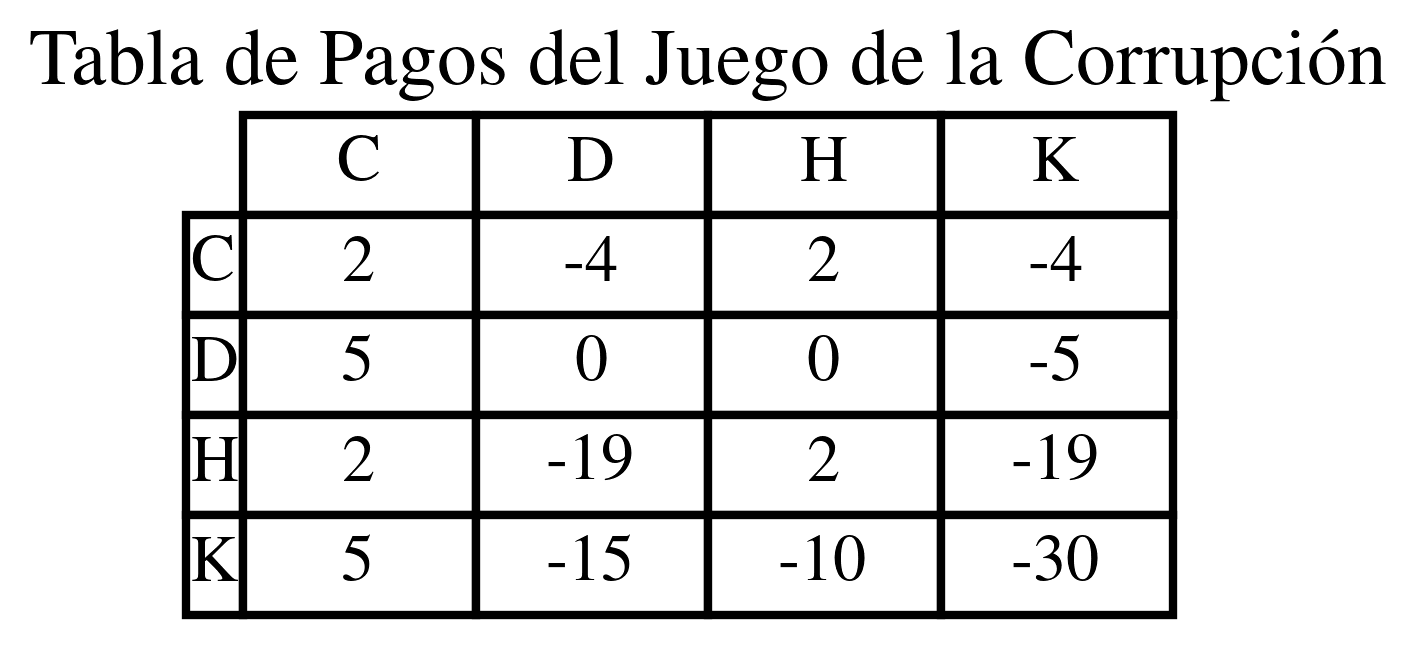

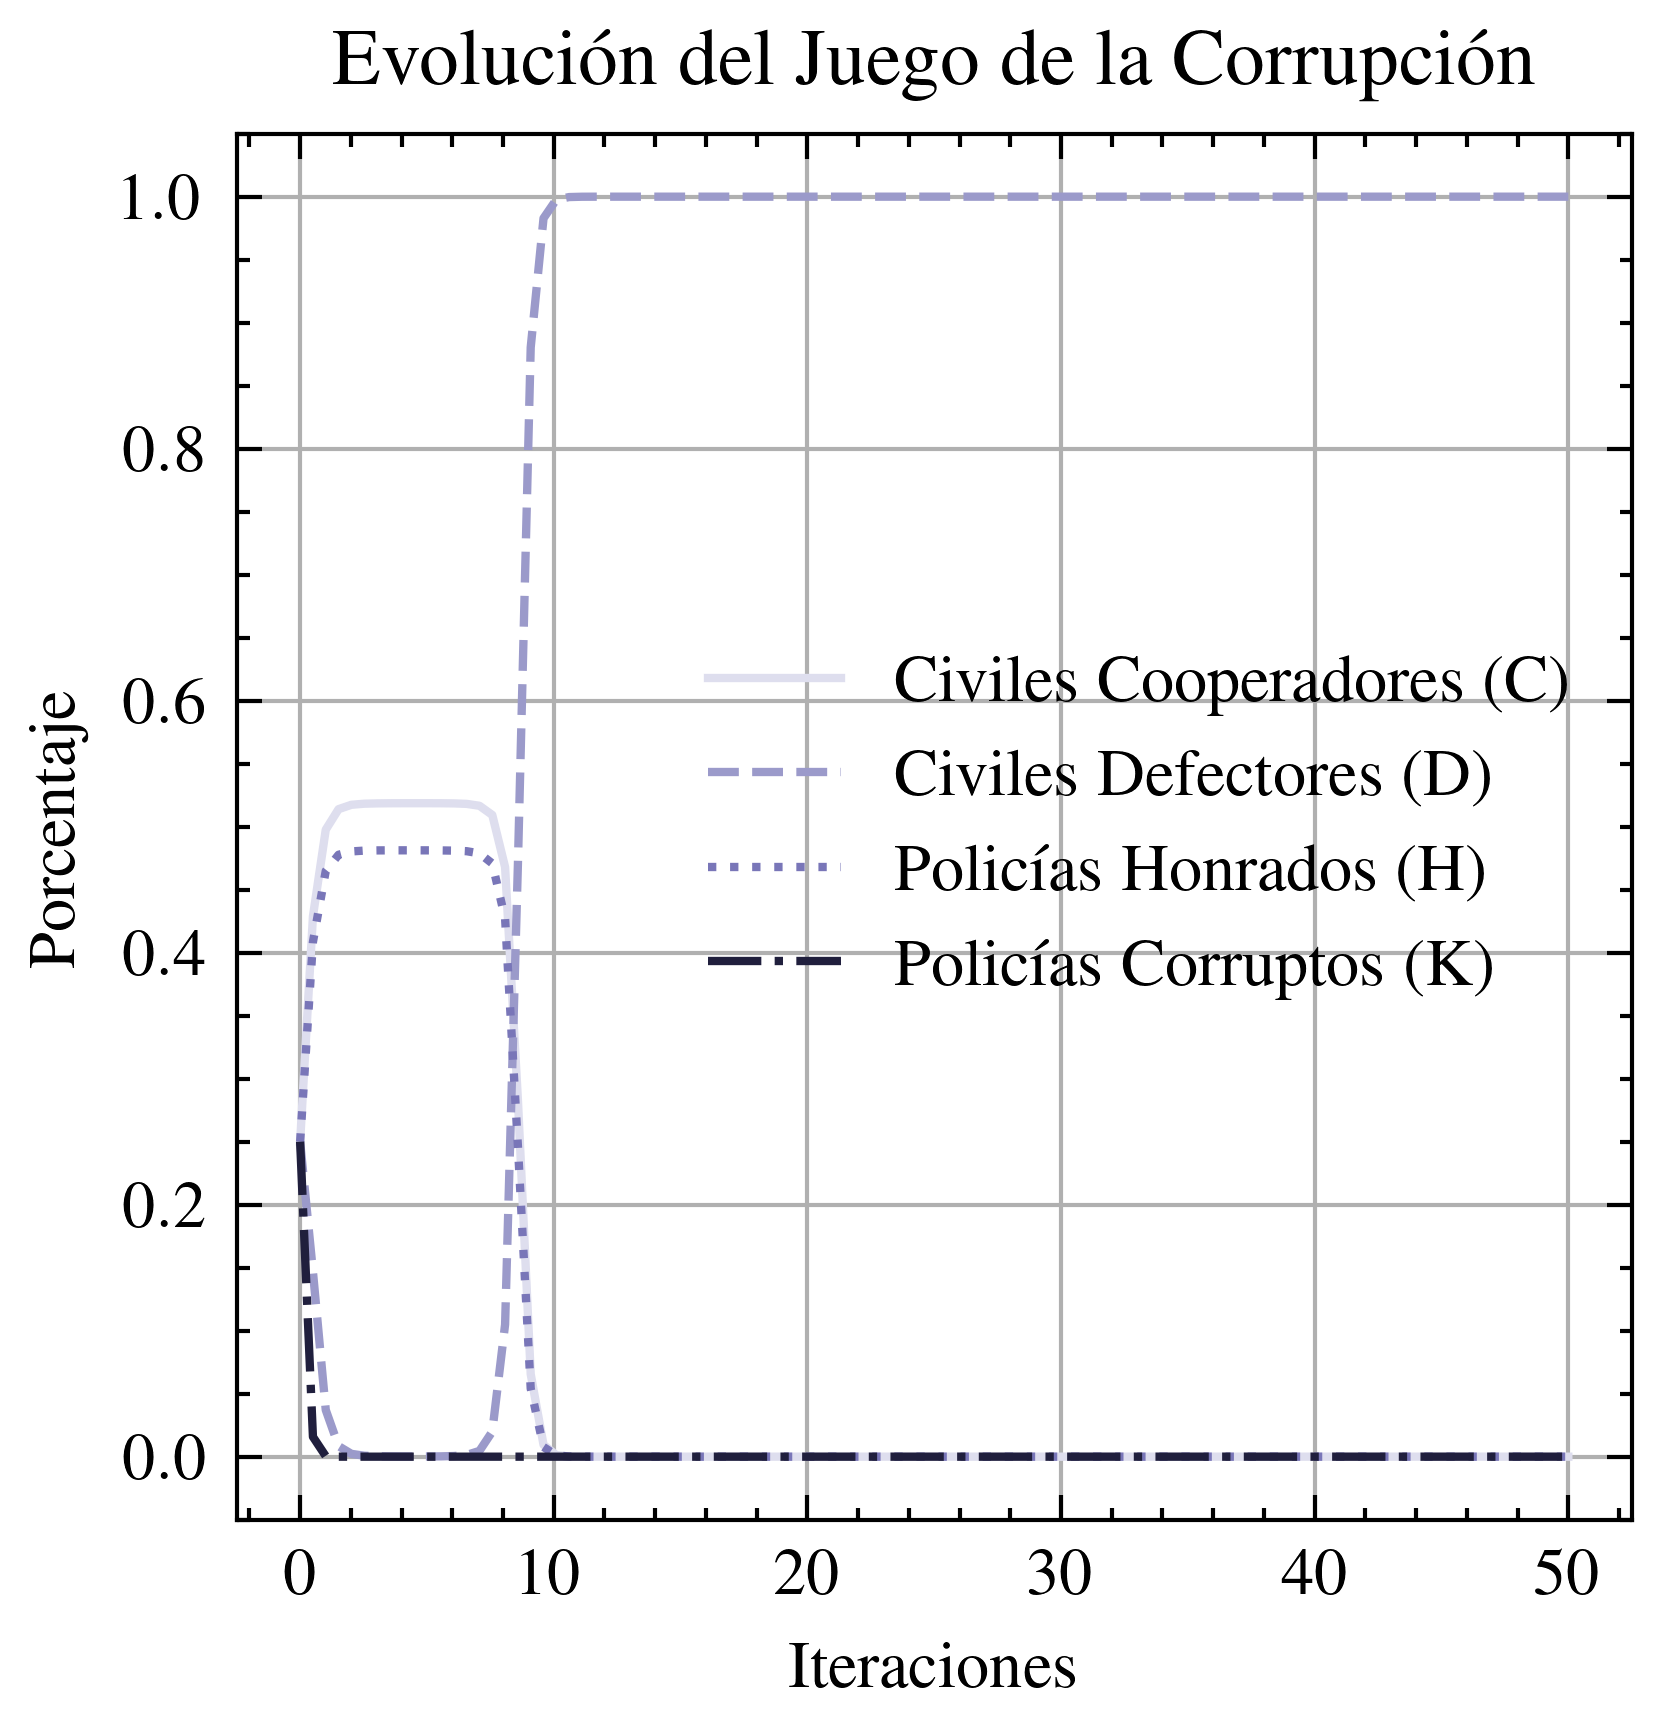

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scienceplots
import matplotlib.patches as patches

plt.style.use(('science', 'ieee'))

# Parámetros del juego (pueden ajustarse)
r = 2   # Recompensa por cooperación mutua
s = 4   # Pérdida por ser cooperador cuando el otro es defector
t = 5   # Ganancia por ser defector cuando el otro es cooperador
p = 5  # Castigo para civiles que desertan
q = 15   # Castigo para policías que desertan
c = 15  # Costo para policías de castigar a civiles
d = 15  # Costo para policías de castigar a policías


# Función para verificar las desigualdades
def check_inequalities(r, s, t, p, q, c, d):
    """
    Verifica que se cumplen las desigualdades del modelo.

    Args:
        r, s, t, p, q, c, d: Parámetros del modelo.
    
    Returns:
        bool: True si todas las desigualdades se cumplen, False si no.
    """
    if not (t > r > t - s):
        print("Error: No se cumple t > r > t - s")
        return False
    if not (t - s > 0):
        print("Error: No se cumple t - s > 0")
        return False
    if not (p > 0):
        print("Error: No se cumple p > 0")
        return False
    if not (c > 0):
        print("Error: No se cumple c > 0")
        return False
    if not (q > 0):
        print("Error: No se cumple q > 0")
        return False
    if not (d > 0):
        print("Error: No se cumple d > 0")
        return False
    return True


# Ecuaciones diferenciales para el modelo del Juego de la Corrupción
def corruption_game_equations(x, t):
    """
    Define las ecuaciones diferenciales del juego de la corrupción.

    Args:
        x (list): Lista con las proporciones de cada estrategia [c, d, h, k].
        t (float): Tiempo actual (no se usa directamente, pero requerido por odeint).

    Returns:
        list: Lista de las derivadas temporales de las proporciones [dc/dt, dd/dt, dh/dt, dk/dt].
    """

    c, d, h, k = x  # Desempaqueta las proporciones de las estrategias.
    
    # Matriz de pagos del juego de la corrupción (ver el artículo).
    payoff_matrix = np.array([
    [r,   -s,  r,  -s],
    [t,    0, t-p, -p],
    [r, -s-c, r, -s-d],
    [t,  -c, t-q, -q-d]
    ])

    # Vector de las proporciones de las estrategias. (Todas son iguales con 25% al inicio)
    strategy_vector = np.array([c, d, h, k])

    # Calcula los pagos medios para cada estrategia. Multiplicando la matriz de pagos por el vector de proporciones.
    mean_payoffs = payoff_matrix @ strategy_vector

    # Calcula el pago medio de toda la población.
    population_mean_payoff = np.dot(strategy_vector, mean_payoffs)

    # Calcula las derivadas de cada proporción.
    dc_dt = c * (mean_payoffs[0] - population_mean_payoff)
    dd_dt = d * (mean_payoffs[1] - population_mean_payoff)
    dh_dt = h * (mean_payoffs[2] - population_mean_payoff)
    dk_dt = k * (mean_payoffs[3] - population_mean_payoff)
    
    return [dc_dt, dd_dt, dh_dt, dk_dt]

def simulate_corruption_game(initial_conditions, time_points):
    """
    Simula el juego de la corrupción.

    Args:
        initial_conditions (list): Proporciones iniciales de cada estrategia.
        time_points (array): Tiempo en que se simula el juego.
    
    Returns:
        array: Matriz con la evolución de las proporciones de cada estrategia con el tiempo.
    """

    # Simula el juego usando las ecuaciones diferenciales.
    results = odeint(corruption_game_equations, initial_conditions, time_points)
    
    return results
    
def plot_results(results, time_points):
  """
    Genera un gráfico de las estrategias a lo largo del tiempo.

    Args:
        results (array): Matriz de la evolución de las proporciones de cada estrategia.
        time_points (array): Vector con los tiempos de la simulación.
  """
  c_results = results[:, 0]
  d_results = results[:, 1]
  h_results = results[:, 2]
  k_results = results[:, 3]
  
  
  plt.figure(figsize=(3, 3))
  
  
  # Define los colores para cada línea
  colors = ['#DEDEEE', '#9B9ACA', '#7976B8', '#201F3D']

  plt.plot(time_points, c_results, label='Civiles Cooperadores (C)', color=colors[0])
  plt.plot(time_points, d_results, label='Civiles Defectores (D)', color=colors[1])
  plt.plot(time_points, h_results, label='Policías Honrados (H)', color=colors[2])
  plt.plot(time_points, k_results, label='Policías Corruptos (K)', color=colors[3])

  plt.xlabel('Iteraciones')
  plt.ylabel('Porcentaje')
  plt.title('Evolución del Juego de la Corrupción')
  plt.legend()
  plt.grid(True)
  plt.savefig('juegoDeLaCorrupcion.png', dpi=300)
  plt.show()

def plot_payoff_table(r, s, t, p, q, c, d):
        """
        Grafica la tabla de pagos del juego de la corrupción.

        Args:
            r, s, t, p, q, c, d: Parámetros del juego.
        """

        payoff_matrix = np.array([
        [r, -s, r, -s],
        [t, 0, t - p, -p],
        [r, -s - c, r, -s - d],
        [t, -c, t - q, -q - d]
    ])
        
        fig, ax = plt.subplots(figsize=(2, 1))
        ax.axis('off')  # Ocultar ejes
        
        # Nombres de las estrategias
        strategies = [' C ', ' D ', ' H ', ' K ']
        
        # Colores para resaltar los cuadrantes
        colors = ['lavender', 'midnightblue']
        
        # Dibuja la tabla
        table = ax.table(cellText=payoff_matrix, 
                        colLabels=strategies,
                        rowLabels=strategies,
                        cellLoc='center', 
                        loc='center', 
                        fontsize=12)
        table.auto_set_font_size(True)
        #table.set_fontsize(12)

        

        plt.title('Tabla de Pagos del Juego de la Corrupción')
        plt.savefig('tablaPagos.png', dpi=300) # Guarda la tabla como imagen
        plt.show()

# Condiciones iniciales
initial_conditions = [0.25, 0.25, 0.25, 0.25]
time_points = np.linspace(0, 50, 100)

# Verificar las desigualdades antes de simular
if check_inequalities(r, s, t, p, q, c, d):
    # Simula el juego
    results = simulate_corruption_game(initial_conditions, time_points)
    # Grafica la tabla de pagos
    plot_payoff_table(r, s, t, p, q, c, d)
    
    # Grafica los resultados
    plot_results(results, time_points)
    
else:
    print("Error: Los parámetros no cumplen las desigualdades. La simulación no se ejecutará.")

Antes de trabajar con las simulaciones de todos los paises se crea un pequeño programa para limpiar la caché de mathplotlib, ocurre cuando existen errores al graficar 

In [21]:
#Pequeño programa para limpiar la caché de matplotlib, 
# sucede cuando hay archivos curruptos debido a un reinicio inesperado de la computadora

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import shutil
import os

# Limpiar la caché de matplotlib
cache_dir = mpl.get_cachedir()
tex_cache_dir = os.path.join(cache_dir, 'tex.cache')
if os.path.exists(tex_cache_dir):
    shutil.rmtree(tex_cache_dir)
    print(f"Caché de tex eliminada: {tex_cache_dir}")
else:
    print(f"No se encontró la caché de tex: {tex_cache_dir}")


Caché de tex eliminada: C:\Users\Trisolaris\.matplotlib\tex.cache


Se encapusla el código en una función para poder llamarla desde el script principal.

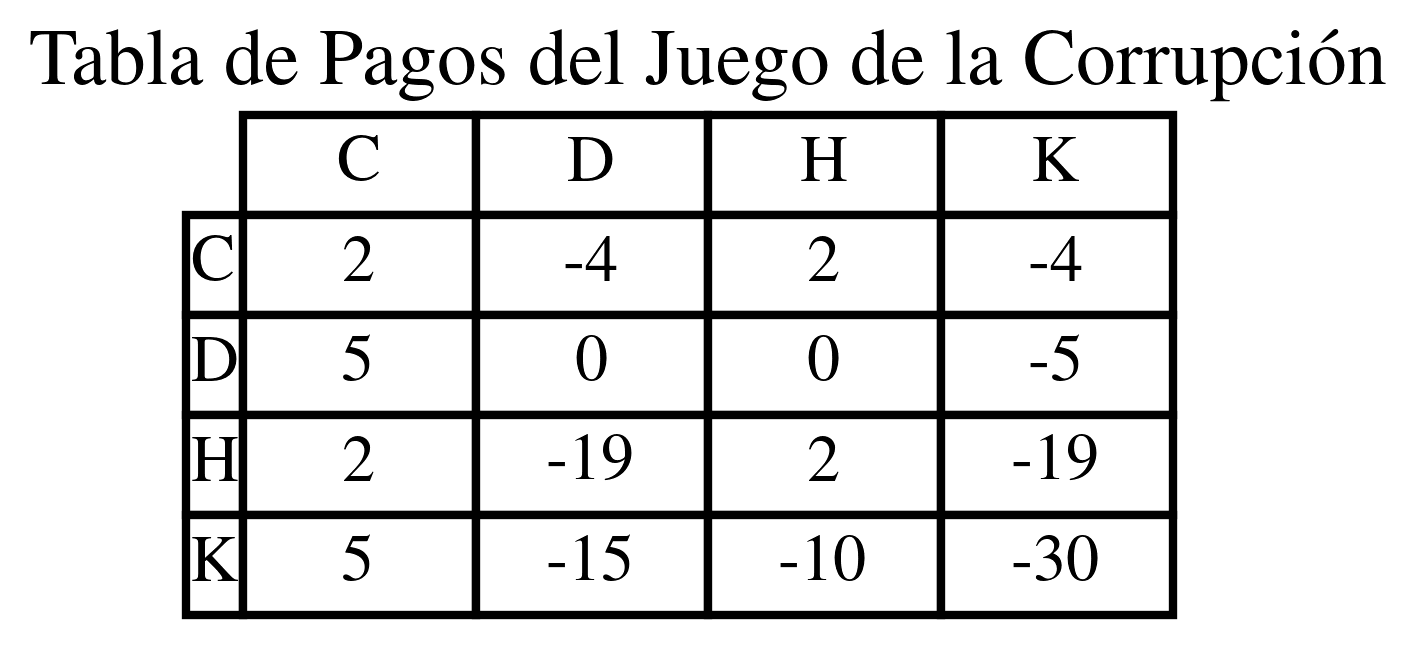

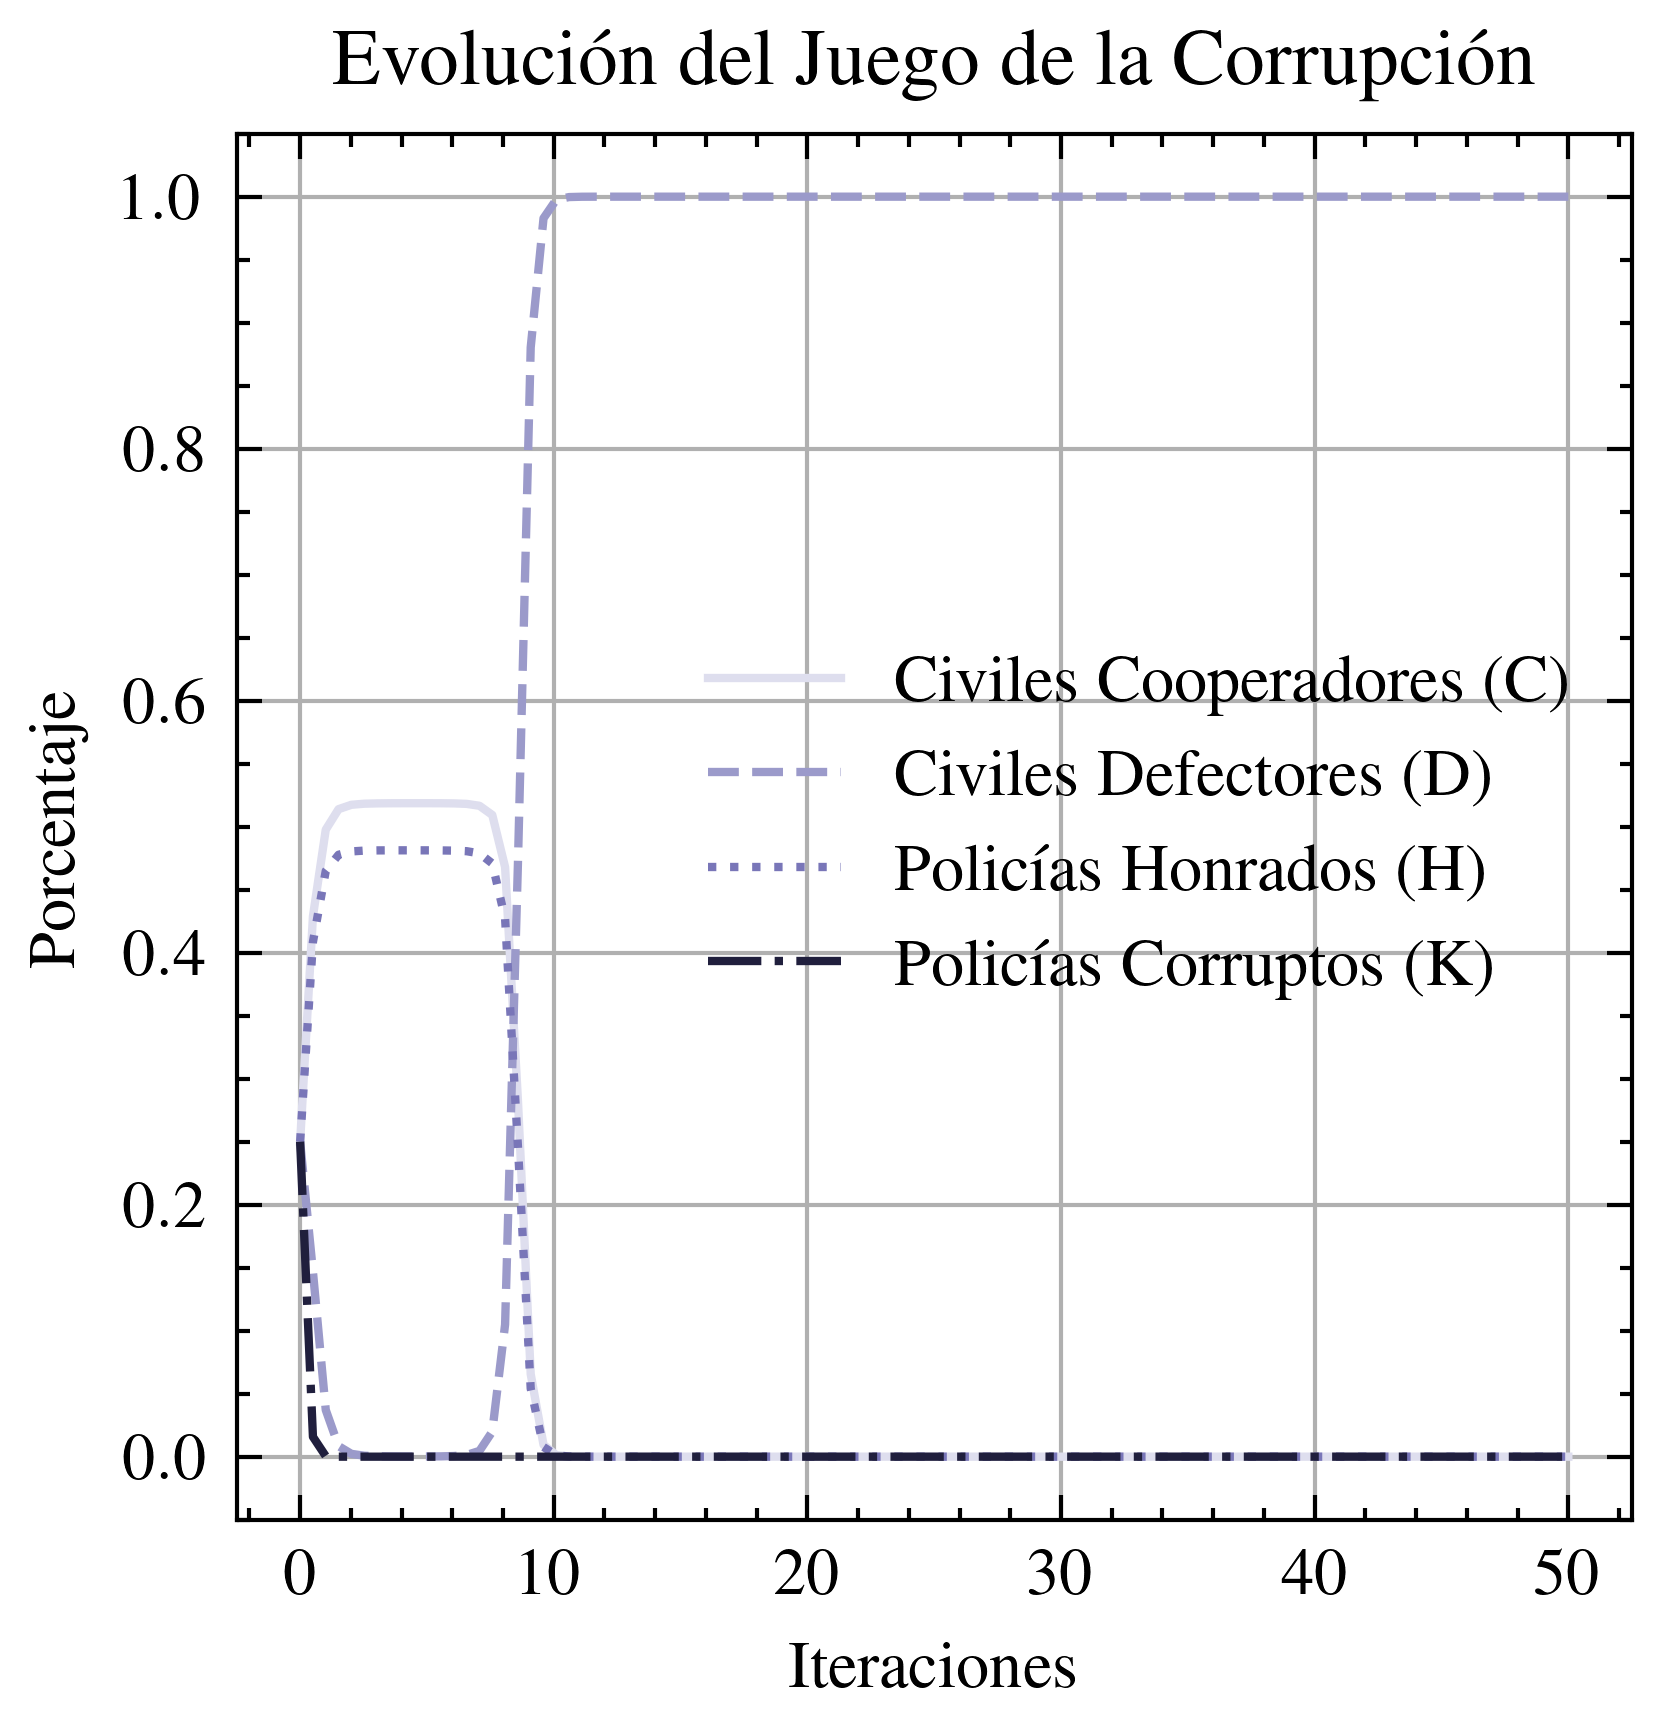

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scienceplots
import matplotlib.patches as patches

plt.style.use(('science', 'ieee'))

# Función para simular y graficar el juego de la corrupción
def run_corruption_simulation(r, s, t, p, q, c, d):
    """
    Simula el juego de la corrupción y genera ambas gráficas.

    Args:
        r, s, t, p, q, c, d: Parámetros del juego.
    """

    # Función para verificar las desigualdades
    def check_inequalities(r, s, t, p, q, c, d):
      if not (t > r > t - s):
        print("Error: No se cumple t > r > t - s")
        return False
      if not (t - s > 0):
          print("Error: No se cumple t - s > 0")
          return False
      if not (p > 0):
          print("Error: No se cumple p > 0")
          return False
      if not (c > 0):
          print("Error: No se cumple c > 0")
          return False
      if not (q > 0):
          print("Error: No se cumple q > 0")
          return False
      if not (d > 0):
          print("Error: No se cumple d > 0")
          return False
      return True
      
    # Ecuaciones diferenciales para el modelo del Juego de la Corrupción
    def corruption_game_equations(x, t):
      c, d, h, k = x
      payoff_matrix = np.array([
        [r,   -s,  r,  -s],
        [t,    0, t-p, -p],
        [r, -s-c, r, -s-d],
        [t,  -c, t-q, -q-d]
      ])
      strategy_vector = np.array([c, d, h, k])
      mean_payoffs = payoff_matrix @ strategy_vector
      population_mean_payoff = np.dot(strategy_vector, mean_payoffs)
      dc_dt = c * (mean_payoffs[0] - population_mean_payoff)
      dd_dt = d * (mean_payoffs[1] - population_mean_payoff)
      dh_dt = h * (mean_payoffs[2] - population_mean_payoff)
      dk_dt = k * (mean_payoffs[3] - population_mean_payoff)
      return [dc_dt, dd_dt, dh_dt, dk_dt]

    def simulate_corruption_game(initial_conditions, time_points):
      results = odeint(corruption_game_equations, initial_conditions, time_points)
      return results
      
    def plot_results(results, time_points):
      c_results = results[:, 0]
      d_results = results[:, 1]
      h_results = results[:, 2]
      k_results = results[:, 3]
      
      plt.figure(figsize=(3, 3))
      
      colors = ['#DEDEEE', '#9B9ACA', '#7976B8', '#201F3D']
      plt.plot(time_points, c_results, label='Civiles Cooperadores (C)', color=colors[0])
      plt.plot(time_points, d_results, label='Civiles Defectores (D)', color=colors[1])
      plt.plot(time_points, h_results, label='Policías Honrados (H)', color=colors[2])
      plt.plot(time_points, k_results, label='Policías Corruptos (K)', color=colors[3])

      plt.xlabel('Iteraciones')
      plt.ylabel('Porcentaje')
      plt.title('Evolución del Juego de la Corrupción')
      plt.legend()
      plt.grid(True)
      plt.savefig('juegoDeLaCorrupcion.png', dpi=300)
      plt.show()

    def plot_payoff_table(r, s, t, p, q, c, d):
      payoff_matrix = np.array([
        [r, -s, r, -s],
        [t, 0, t - p, -p],
        [r, -s - c, r, -s - d],
        [t, -c, t - q, -q - d]
      ])
      
      fig, ax = plt.subplots(figsize=(2, 1))
      ax.axis('off')
      
      strategies = [' C ', ' D ', ' H ', ' K ']
      colors = ['lavender', 'midnightblue']
      
      table = ax.table(cellText=payoff_matrix, 
                      colLabels=strategies,
                      rowLabels=strategies,
                      cellLoc='center', 
                      loc='center', 
                      fontsize=12)
      table.auto_set_font_size(True)
      
      plt.title('Tabla de Pagos del Juego de la Corrupción')
      plt.savefig('tablaPagos.png', dpi=300)
      plt.show()
      
    # Condiciones iniciales
    initial_conditions = [0.25, 0.25, 0.25, 0.25]
    time_points = np.linspace(0, 50, 100)
        
    # Verificar las desigualdades antes de simular
    if check_inequalities(r, s, t, p, q, c, d):
        # Simula el juego
        results = simulate_corruption_game(initial_conditions, time_points)
        # Grafica la tabla de pagos
        plot_payoff_table(r, s, t, p, q, c, d)
        # Grafica los resultados
        plot_results(results, time_points)   
    else:
        print("Error: Los parámetros no cumplen las desigualdades. La simulación no se ejecutará.")

# Parámetros del juego (pueden ajustarse)
r = 2  
s = 4  
t = 5  
p = 5  
q = 15 
c = 15 
d = 15 

# Llama a la función para ejecutar la simulación
run_corruption_simulation(r, s, t, p, q, c, d)

# Modelacion

### Se crean los casos para cada país. 
---
Acorde al artículo *Power and Corruption* de Ubeda et al. existen equilibrios correspondientes a ciertas configuraciones.

# Dinamarca

In [20]:
# Parámetros del juego propuesto para Dinamarca
r = 1
s = 2
t = 2
p = 2
q = 3
c = 2
d = 2

# Llama a la función para ejecutar la simulación
run_corruption_simulation(r, s, t, p, q, c, d)

Error: No se cumple t - s > 0
Error: Los parámetros no cumplen las desigualdades. La simulación no se ejecutará.
